## Scientific Computation Lab 6 solution 

### Numerical solution of linearized predator-prey dynamics

You will first compute numerical solutions to the following (familiar) IVP:

$\frac{dx}{dt} =  - y $

$\frac{dy}{dt} =  a x$

$x(0)=\delta, ~ y(0)=\delta$

and $a$ and $\delta$ are parameters that you will set.

1) Use solve_ivp with the 'BDF' method to compute a numerical solution to this problem at times $t_i=i \Delta t, ~ i=1,2,3,..., Nt$ where $\Delta t$ is the time step that you will set. The solution should be stored in an $Nt+1$ x $2$ Numpy array, z, where the first column contains $x$, the second column contains $y$, and the first row contains the initial conditions. 
Complete the code in the cell below to compute this solution. Initially set $\Delta t=0.05$, $\delta = 1$, $a=4$, and $Nt=200$. Make a plot that displays both $x(t)$ and $y(t)$. It may be helpful to read through one or two examples at the bottom of the documentation page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

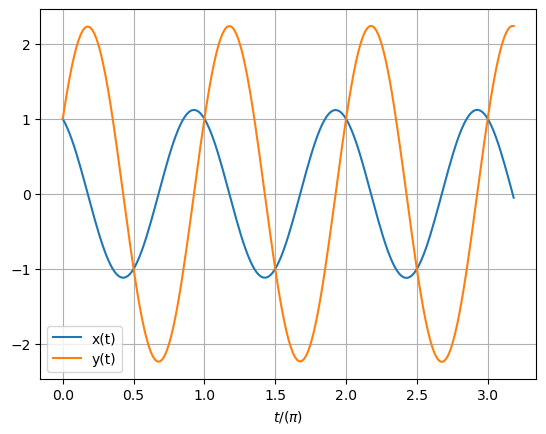

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from time import time

a = 4
delta = 1
Dt = 0.05
Nt = 200
t = np.linspace(0,Nt*Dt,Nt+1)
z0 = np.array([delta,delta])

def RHS(t,z,a):
    """
    This function has been written in a slightly inefficient way to enhance clarity
    """
    x,y = z[0],z[1]
    dxdt = -y
    dydt = a*x
    return [dxdt,dydt]
    
    
sol = solve_ivp(RHS, [t[0],t[-1]], z0,t_eval=t, args=(a,),method='BDF') 

#obtain and display solution
z = sol.y

plt.figure()
plt.plot(t/(np.pi),z.T)
plt.xlabel(r'$t/(\pi)$')
plt.legend(('x(t)','y(t)'))
plt.grid()

2) Now, you will investigate the accuracy of your solution. You have been provided with a function which computes the exact solution, $x(t)$ with the model parameter values used above. Compute and display the error, $\epsilon(t)=|x_{exact}(t)-x_{comp}(t)|$. Then recompute the numerical solution using $t2$ below (notice that the time step will now be 10 times smaller). Compute the error and add it to your plot. Is the result what you expect?
Finally, compute the numerical solution using $t$ from above, but with $atol$ and $rtol$ reduced substantially from their default values. Compute the error for this solution and add it to your plot. Has the error been reduced?


In [7]:
def x_exact(t):
    """
    Compute exact solution for x(t) corresponding to ODEs above with a=4, x(0)=1, and y(0)=1
    """
    l1,l2 = 1j*2,-1j*2
    x = 2*np.real((0.5+0.25j)*np.exp(l1*t))
    return x

xe = x_exact(t)

Text(0.5, 1.0, 'BDF method')

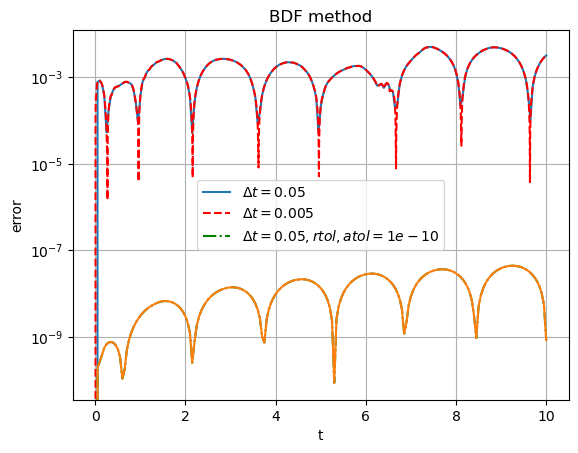

In [3]:
error = np.abs(z[0,:]-xe)
plt.figure()
plt.semilogy(t,error,label=r'$\Delta t=0.05$')


t2 = np.linspace(0,Nt*Dt,10*Nt+1)
sol2 = solve_ivp(RHS, [t2[0],t2[-1]], z0,t_eval=t2, args=(a,),method='BDF') 
z2 = sol2.y
xe2 = x_exact(t2)
error2 = np.abs(z2[0,:]-xe2)
plt.semilogy(t2,error2,'r--',label=r'$\Delta t=0.005$')

ta = time()
sol3 = solve_ivp(RHS, [t[0],t[-1]], z0, t_eval=t,args=(a,),method='BDF',atol=1e-10,rtol=1e-10) 
tb = time()
wtime3 = tb-ta

z3 = sol3.y
error3 = np.abs(z3[0,:]-xe)
plt.semilogy(t,error3,'g-.',label=r'$\Delta t=0.05, rtol,atol=1e-10$')

plt.semilogy(t,error3)
plt.xlabel('t')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.title('BDF method')

3) The function *eEuler* below applies the explicit Euler method to the ODEs above. Examine how the error at $t=10$ varies with the time step, $\Delta t$. How small does $\Delta t$ need to be to match the error produced by the initial solve_ivp calculation at $t=10$?

(201, 2) (201,) (201,) (201,)


Text(0.5, 1.0, 'Dependence of error at $t=10$ on time step with e-Euler method')

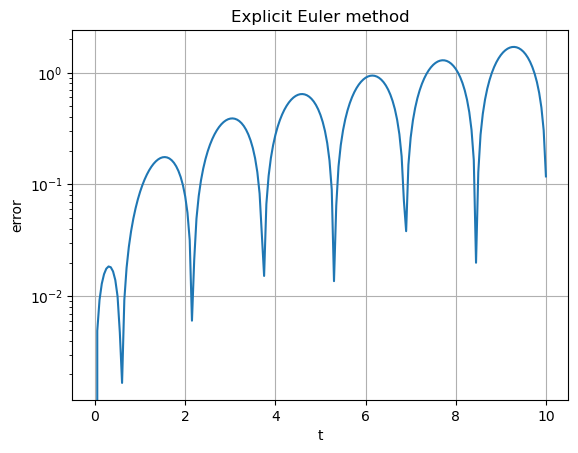

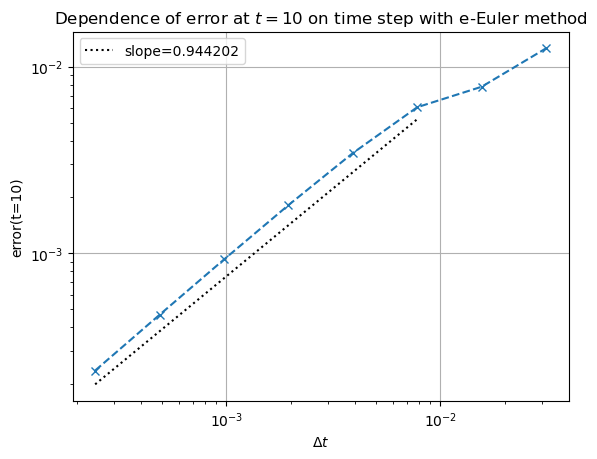

In [4]:
def eEuler(t,z0,a):
    """
    Use explicit Euler method to solve IVP above
    input:
    t: times at which to return the solution, initial condition is enforced at t[0]
    z0: initial condition
    a: model parameter
    output:
    z: Nt x 2 array containing solution (including initial condition)
    """
    Nt = t.size
    Dt = t[1]-t[0]
    aDt = a*Dt
    z = np.zeros((Nt,2))
    z[0,:] = z0
    for i in range(1,Nt):
        z[i,0] = z[i-1,0]-Dt*z[i-1,1]
        z[i,1] = z[i-1,1]+aDt*z[i-1,0]
    return z

ta = time()
z4 = eEuler(t,z0,a)
tb = time()
wtime4 = tb-ta
error4 = np.abs(z4[:,0]-xe)
print(z4.shape,xe.shape,error4.shape,t.shape)

plt.figure()
plt.semilogy(t,error4,label=r'$\Delta t=0.05$')
plt.xlabel('t')
plt.ylabel('error')
plt.title('Explicit Euler method')
plt.grid()

Dtvals = np.logspace(-12,-5,8,base=2)
epsvals = []
wtime_vals = []

for Dt in Dtvals:
    te = np.linspace(0,10,int(10/Dt))
    ta =time()
    z_ee = eEuler(te,z0,a)
    tb = time()
    epsvals.append(np.abs(z_ee[-1,0]-xe[-1]))
    wtime_vals.append(tb-ta)

plt.figure()
plt.loglog(Dtvals,epsvals,'x--')
c,d = np.polyfit(np.log2(Dtvals[:-2]),np.log2(epsvals[:-2]),1)
plt.plot(Dtvals[:-2],np.exp(d)*Dtvals[:-2]**c,'k:',label='slope=%f' %(c))
plt.xlabel(r'$\Delta t$')
plt.ylabel('error(t=10)')
plt.grid()
plt.legend()
plt.title("Dependence of error at $t=10$ on time step with e-Euler method")

4) We can control the error for both the explict Euler and BDF methods. How would you decide which method is better?

5) You will now consider the following stochastic version of the linear predator-prey model:

$dx =  - y dt + \mu dW(t) $

$dy =  (a x) dt$

$x(0)=\delta, ~ y(0)=\delta$

You have been provided code below which applies the E-M method to the example ODE from lecture. Note that it has been modified to work for the specific case where $\delta t = \Delta t$. Modify the code to solve the model equations above. Compute and display your computed approximation for $\left<x(t)\right>$ with $\mu=1$,$\delta=1$, and $a=4$. Does it match what you expect? Note that $\left<dW(t)\right>=0$. Also compute an approximation for $\left<x(t)^2\right>$ with $\mu=1$ and $\mu=2$. What effect does $\mu$ have on the results?

In [8]:
"""
E-M method applied to example ODE from lecture to compute X(t=T) M times. Note that Dt=dt here.
"""
import numpy as np
import matplotlib.pyplot as plt

#set model parameters
T = 1
l = 2
mu = 1
X0 = 1

#set numerical parameters
M = 1000
nt = 2**9
dt = T/nt

Nt = nt
Dt = T/Nt

fac = (1+l*Dt)
tb = np.linspace(0,T,nt+1)
t = np.linspace(0,T,Nt+1)

#initialise arrays
dW = np.sqrt(dt)*np.random.normal(size=(nt,M))

X = np.zeros((nt+1,M))
X[0,:] = X0
#Iterate over Nt time steps
for j in range(Nt):
    #Update X using ODE
    X[j+1,:] = (fac+mu*dW[j,:])*X[j,:]

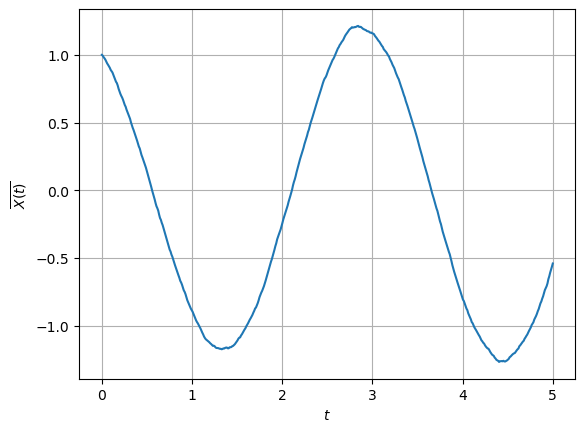

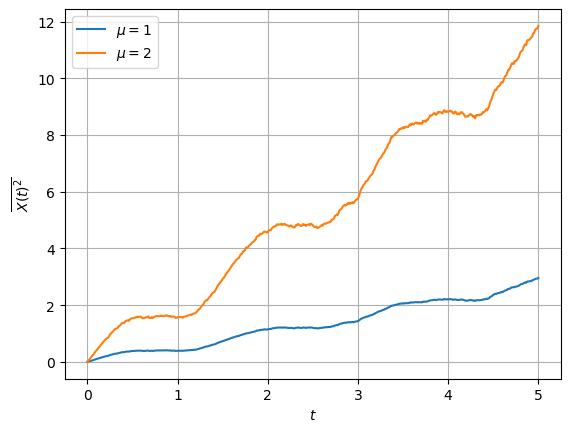

In [9]:
"""
E-M method applied to lab ODE to compute X(t=T) M times.
"""

import numpy as np
import matplotlib.pyplot as plt

#set model parameters
T = 5
a = 4
muvals = 1,2
delta = 1

#set numerical parameters
M = 1000
nt = 2**9
dt = T/nt

Nt = nt
Dt = T/Nt

fac = a*Dt
tb = np.linspace(0,T,nt+1)
t = np.linspace(0,T,Nt+1)

#initialize arrays
dW= np.sqrt(dt)*np.random.normal(size=(nt,M))

X = np.zeros((nt+1,M,2))
Y = X.copy()

X[0,:,:] = delta 
Y[0,:,:] = delta

#Iterate over Nt time steps
for j in range(Nt):
    #Update X and Y using ODE
    #mu=1
    X[j+1,:,0] = X[j,:,0]+muvals[0]*dW[j,:] - Dt*Y[j,:,0]
    Y[j+1,:,0] = fac*X[j,:,0] + Y[j,:,0]

    #mu=2
    X[j+1,:,1] = X[j,:,1]+muvals[1]*dW[j,:] - Dt*Y[j,:,1]
    Y[j+1,:,1] = fac*X[j,:,1] + Y[j,:,1]

    
#compute and display statistics
Xave = X.mean(axis=1)
Xvar = X.var(axis=1)

plt.figure()
plt.plot(t,Xave[:,0])
plt.xlabel(r'$t$')
plt.ylabel(r'$\overline{X(t)}$')
plt.grid()

plt.figure()
plt.plot(t,Xvar)
plt.xlabel(r'$t$')
plt.ylabel(r'$\overline{X(t)^2}$')
plt.legend(('$\mu=1$','$\mu=2$'))
plt.grid()